In [ ]:
pip install --upgrade tensorflow

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeUniform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras_tuner as kt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import LeakyReLU

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heartDT_Filtered.csv to heartDT_Filtered.csv


In [ ]:
df_heart = pd.read_csv('/content/heartDT_Filtered.csv')
X = df_heart.drop('cardio', axis=1)
y = df_heart['cardio']

In [ ]:
df_heart.dtypes

,0
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64
alco,int64


In [ ]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
batch_size = 100
epochs = 100
learning_rate = 0.001
initializer = HeUniform()
optim = tf.keras.optimizers.Adam(learning_rate=learning_rate)
activation = LeakyReLU(alpha=0.01)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
configure_layers=[

    (1, 16),
    (1, 32),
    (1, 64),
    (1, 128),
    (2, 16),
    (2, 32),
    (2, 64),
    (2, 128),
    (3, 16),
    (3, 32),
    (3, 64),
    (3, 128),
    (4, 16),
    (4, 32),
    (4, 64),
    (4, 128),
]

In [ ]:
def build_model(num_layers, num_neurons,l2_reg=0.01):
    model = Sequential()
    model.add(Dense(12, activation=activation, kernel_initializer=initializer,input_shape=(12,)))
   #model.add(activation)
    for i in range(num_layers):
      model.add(Dense(num_neurons,activation='relu',kernel_initializer=initializer,kernel_regularizer=l2(l2_reg)))
      #model.add(activation)
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))
    return model



In [ ]:
final_results_dict = {}


In [ ]:
best_accuracy=0

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


419/419 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5013 - loss: 1.2707 - val_accuracy: 0.6977 - val_loss: 0.7047
Epoch 2/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7085 - loss: 0.6662 - val_accuracy: 0.7233 - val_loss: 0.6038
Epoch 3/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7257 - loss: 0.5935 - val_accuracy: 0.7220 - val_loss: 0.5769
Epoch 4/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7284 - loss: 0.5733 - val_accuracy: 0.7245 - val_loss: 0.5655
Epoch 5/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7298 - loss: 0.5597 - val_accuracy: 0.7246 - val_loss: 0.5593
Epoch 6/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7300 - loss: 0.5552 - val_accuracy: 0.7282 - val_loss: 0.5571
Epoch 7/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7258 - loss: 0.5542 - val_accuracy: 0.7295 - val_loss: 0.5543
Epoch 8/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7325 - loss: 0.5488 - val_accuracy: 0.7268

Validation accuracy with 1 layers and 16 neurons per layer: 0.7354937195777893
Epoch 1/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6217 - loss: 1.1732 - val_accuracy: 0.7186 - val_loss: 0.7238
Epoch 2/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7243 - loss: 0.6796 - val_accuracy: 0.7257 - val_loss: 0.5980
Epoch 3/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.5868 - val_accuracy: 0.7267 - val_loss: 0.5684
Epoch 4/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7317 - loss: 0.5638 - val_accuracy: 0.7287 - val_loss: 0.5583
Epoch 5/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7268 - loss: 0.5584 - val_accuracy: 0.7287 - val_loss: 0.5560
Epoch 6/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7302 - loss: 0.5519 - val_accuracy: 0.7292 - val_loss: 0.5519
Epoch 7/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7314 - loss: 0.5487 - val_accuracy: 0.7301 - val_loss: 0.5499
Epoch 8/100
419/41

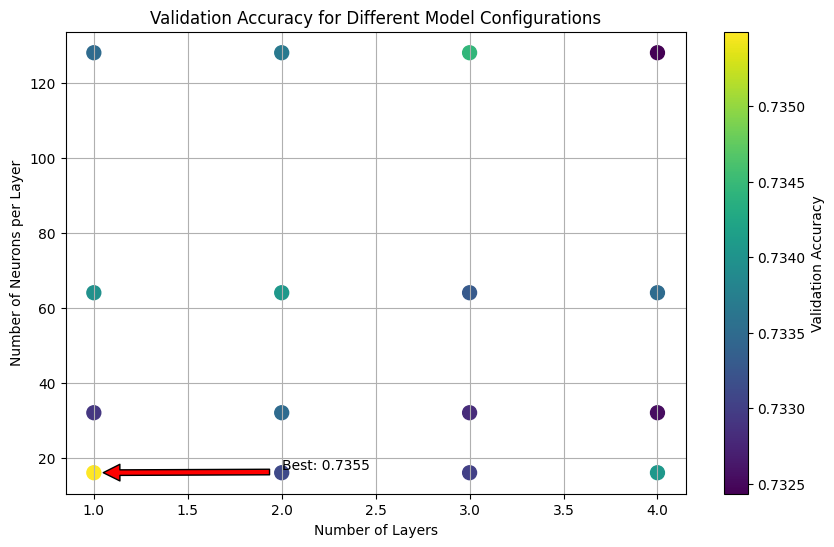

In [ ]:
for num_layers, num_neurons in configure_layers:

  model = build_model(num_layers, num_neurons)
  optim = Adam(learning_rate=learning_rate)
  model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)


  val_accuracy = max(history.history['val_accuracy'])
  final_results_dict[(num_layers, num_neurons)] = val_accuracy
  print(f'Validation accuracy with {num_layers} layers and {num_neurons} neurons per layer: {val_accuracy}')
  if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    model.save('best_model_optimized.h5')

best_config = max(final_results_dict.items(), key=lambda x: x[1])
best_layers, best_neurons = best_config[0]
best_accuracy = best_config[1]

print(f'Best configuration: {best_layers} layers, {best_neurons} neurons per layer with validation accuracy: {best_accuracy}')


num_layers_list = [key[0] for key in final_results_dict.keys()]
num_neurons_list = [key[1] for key in final_results_dict.keys()]
val_accuracy_list = [value for value in final_results_dict.values()]


plt.figure(figsize=(10, 6))
scatter = plt.scatter(num_layers_list, num_neurons_list, c=val_accuracy_list, cmap='viridis', s=100)
plt.colorbar(scatter, label='Validation Accuracy')


plt.title('Validation Accuracy for Different Model Configurations')
plt.xlabel('Number of Layers')
plt.ylabel('Number of Neurons per Layer')
plt.grid(True)

plt.annotate(f'Best: {best_accuracy:.4f}',
             xy=(best_layers, best_neurons),
             xytext=(best_layers + 1, best_neurons + 1),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

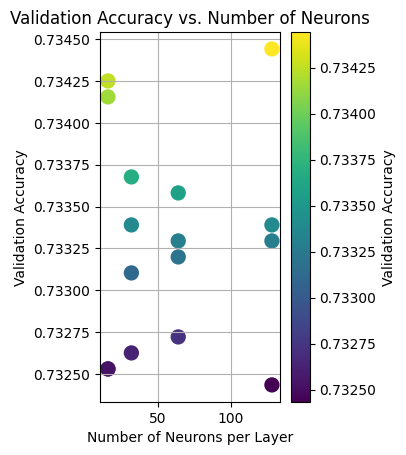

In [ ]:
plt.subplot(1, 2, 1)
scatter = plt.scatter(num_neurons_list, val_accuracy_list, c=val_accuracy_list, cmap='viridis', s=100)
plt.colorbar(scatter, label='Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Neurons')
plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Validation Accuracy')
plt.grid(True)

In [ ]:
num_layers_list = [key[0] for key in final_results_dict.keys()]
num_neurons_list = [key[1] for key in final_results_dict.keys()]
val_accuracy_list = [value for value in final_results_dict.values()]

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
df_heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,0
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,1
2,52,1,165,64.0,130,70,3,1,0,0,0,23.507805,1
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479,1
4,48,1,156,56.0,100,60,1,1,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65376,53,2,168,76.0,120,80,1,1,1,0,1,26.927438,0
65377,62,1,158,126.0,140,90,2,2,0,0,1,50.472681,1
65378,52,2,183,105.0,180,90,3,1,0,1,0,31.353579,1
65379,61,1,163,72.0,135,80,1,2,0,0,0,27.099251,1


Evaluvate the model

In [ ]:
best_model = load_model('/content/best_model_optimized.h5',custom_objects={'LeakyReLU': LeakyReLU})

In [ ]:
y_predict_prob = best_model.predict(X_test)

409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred= (y_predict_prob > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate

In [ ]:
dict_model_score_train={}
dict_model_score_test={}
dict_acc_score={}
dict_percision_score={}
dict_recall_score={}
dict_f1_score={}


Performance Metrics
+-----------------+-----------+
|     Metric      | Score (%) |
+-----------------+-----------+
| Accuracy Score  |   73.19   |
| Percision Score |   73.31   |
|  Recall Score   |   73.19   |
|     F_Score     |   73.1    |
+-----------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6707
           1       0.75      0.68      0.71      6370

    accuracy                           0.73     13077
   macro avg       0.73      0.73      0.73     13077
weighted avg       0.73      0.73      0.73     13077



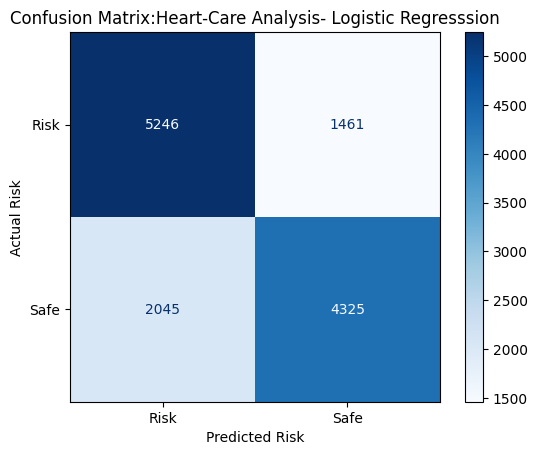

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  #model_score_test = round(best_model.score(X_test, y_test) * 100, 2)
  #model_score_train = round(best_model.score(X_train, y_train) * 100, 2)




  # add in to the dictionary
  m_table=[["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
 # dict_model_score_train['ANN_L1']=model_score_train
 # dict_model_score_test['ANN_L1']=model_score_test
  dict_acc_score["ANN_L1"]=round(acc_score*100,2)
  dict_percision_score['ANN_L1']=round(pre_Score*100,2)
  dict_recall_score['ANN_L1']=round(rec_score*100,2)
  dict_f1_score['ANN_L1']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis- Logistic Regresssion')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)

Check matching records y_test==y_predi



In [ ]:
import numpy as np

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of y_predict: {y_pred.shape}')

Shape of y_test: (13077,)
Shape of y_predict: (13077, 1)


In [ ]:
y_test.shape

(13077,)

In [ ]:
y_pred.shape

(13077, 1)

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
y_pred_1d = y_pred.flatten()

In [ ]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
y_pred_1d.shape

(13077,)

In [ ]:
y_test_df = pd.DataFrame({'label': np.random.randint(2, size=(13077,))})

In [ ]:
y_pred = np.random.randint(2, size=(13077,))

In [ ]:
y_test = y_test_df.values.flatten()

In [ ]:
assert y_test.shape == y_pred.shape

In [ ]:
matching_indices = np.where(y_test == y_pred)[0]
non_matching_indices = np.where(y_test != y_pred)[0]

In [ ]:
matching_indices

array([    3,     4,     5, ..., 13074, 13075, 13076])

In [ ]:
non_matching_indices

array([    0,     1,     2, ..., 13068, 13070, 13071])

In [ ]:
X_matching = X_test[matching_indices]

In [ ]:
X_non_matching = X_test[non_matching_indices]

In [ ]:
y_matching = y_test[matching_indices]

In [ ]:
y_non_matching = y_test[non_matching_indices]

In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 383 (1.50 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_config = best_model.get_config()

In [ ]:
model_config

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 12),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 12,
    'activation': {'module': 'keras.layers',
     'class_name': 'LeakyReLU',
     'config': {'name': 'leaky_re_lu',
      'trainable': True,
      'dtype': {'module': 'keras',
       'class_name': 'DTypePolicy',
       'config': {'name': 'float32'},
       'registered_name': None},
      'negative_slope': 0.01},
     'registered_name': None,
     'build_config

In [ ]:
#build model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LeakyReLU,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
  model = Sequential()
  model.add(Input(shape=(12,), name='input_layer'))
  model.add(Dense(
        units=12,
        kernel_initializer=HeUniform(),
        bias_initializer='zeros',
        kernel_regularizer=None,
        bias_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None,
        name='dense'
    ))
  model.add(LeakyReLU(alpha=0.01, name='leaky_re_lu'))
  model.add(Dense(
    units=16,
    activation='relu',
    kernel_initializer=HeUniform(),
    bias_initializer='zeros',
    kernel_regularizer=l2(0.01),
    name='dense_1'
  ))
  model.add(Dense(
    units=1,
    activation='sigmoid',
    kernel_initializer=HeUniform(),
    bias_initializer='zeros',
    name='dense_2'
    ))
  return model

In [ ]:
new_model = build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
learning_rate = 0.001
optim = Adam(learning_rate=learning_rate)
new_model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_layer2=new_model.fit(X_matching, y_matching, batch_size=batch_size, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5747 - loss: 0.6759 - val_accuracy: 0.4985 - val_loss: 0.7109
Epoch 2/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5839 - loss: 0.6750 - val_accuracy: 0.4992 - val_loss: 0.7118
Epoch 3/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5843 - loss: 0.6790 - val_accuracy: 0.5153 - val_loss: 0.7112
Epoch 4/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5818 - loss: 0.6745 - val_accuracy: 0.5061 - val_loss: 0.7103
Epoch 5/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.6773 - val_accuracy: 0.5061 - val_loss: 0.7107
Epoch 6/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5833 - loss: 0.6760 - val_accuracy: 0.5099 - val_loss: 0.7110
Epoch 7/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5858 - loss: 0.6709 - val_accuracy: 0.4969 - val_loss: 0.7131
Epoch 8/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - loss: 0.6779 - val_accuracy: 0.4985 - v

In [ ]:
num_layers_2nd = 3
num_neurons_2nd = 64
learning_rate_2nd = 0.001
batch_size_2nd = 32
epochs_2nd = 20

In [ ]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),activation=hp.Choice('activation',['relu','tanh','sigmoid']),input_dim=X_matching.shape[1]))
  model.add(Dropout(hp.Float('dropout_rate',min_value=0.1,max_value=0.5,step=0.1)))
  model.add(Dense(units=hp.Int('units2',min_value=32,max_value=256,step=32),activation=hp.Choice('activation2',['relu','tanh','sigmoid'])))
  model.add(Dropout(hp.Float('dropout_rate2',min_value=0.1,max_value=0.5,step=0.1)))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=Adam(hp.Choice('learning_rate',[0.001,0.01,0.1])),loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=20,executions_per_trial=1,directory='project',project_name='heart_disease_ANN_secondLayer')


In [ ]:
tuner.search(X_matching,y_matching,epochs=100,validation_split=0.2)

Trial 20 Complete [00h 00m 35s]
val_accuracy: 0.5221712589263916

Best val_accuracy So Far: 0.5374617576599121
Total elapsed time: 00h 11m 51s
